In [6]:
from main_class import PhysicsInformedGP_regressor
import numpy as np


### First example   
forced damped oscillator:   
\begin{equation}
 \ddot{x} + b\dot{x} + k x = f(t) \; \; \mathrm{ with \; m = 1}
\end{equation}

In [7]:
from kernels.kernel_oscillator import gram_Matrix, k_ff, k_uf, k_fu, k_uu
Kernel = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
params = ["l_x", "sigma_f_sq", "b", "k"]
model_1 = PhysicsInformedGP_regressor(kernel =Kernel, timedependence = False,params=params)
model_1.set_name_kernel("oscillator")
n_training_points = 8
noise = [1e-5,1e-5]
model_1.set_training_data("data_files/data.csv", n_training_points, noise)
model_1.set_validation_data(1000)



c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:523: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = engine.random(n_validation_points)
c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:532: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = engine.random(n_validation_points)


In [8]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((4))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 2, 1)
    theta_initial[2] = rng.uniform(0, 2, 1)
    theta_initial[3] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 100, -1
model_1.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                            'bounds': ((1e-2, None), (1e-2, None), (1e-1, None),(1e-2, None)), #needed for TNC and L-BFGS-B
                            'gtol': 1e-6})

100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


     fun: 0.22599506378173828
     jac: array([ 1.1541519 ,  0.4766426 ,  0.514847  , -0.23892859], dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 94
     nit: 10
  status: 1
 success: True
       x: array([0.476146  , 0.48867634, 1.00905367, 2.00364389])


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


-----------------------------------------------
GP with kernel: 
Training data: (8, 1)
Training targets: (16, 1)
Hyperparameters: {'l_x': 0.4761459958980953, 'sigma_f_sq': 0.48867633560870627, 'b': 1.009053674501603, 'k': 2.003643894013812}
Log marginal likelihood: 0.22599506378173828
Mean squared error: {'u': 3.3506025829410646e-06, 'f': 0.1393163502216339}
-----------------------------------------------



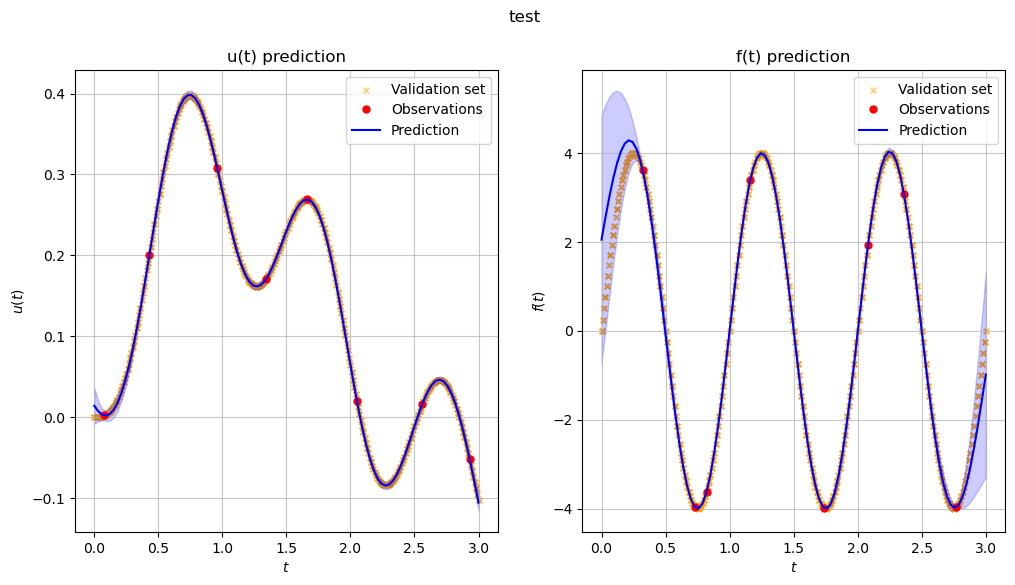

In [9]:
X_star = np.linspace(0,3,100).reshape(-1,1)
model_1.predict_model(X_star)
model_1.mean_u.shape
model_1.plot_prediction(X_star,"test","plots/oscillator/prediction_1d.png")
model_1.error()
print(model_1)

4256.385110702321


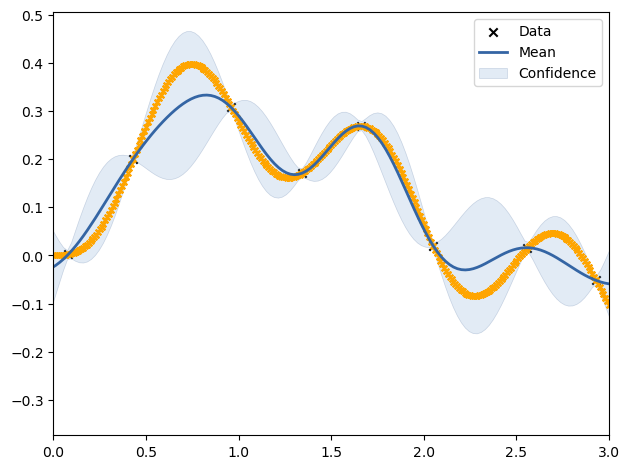

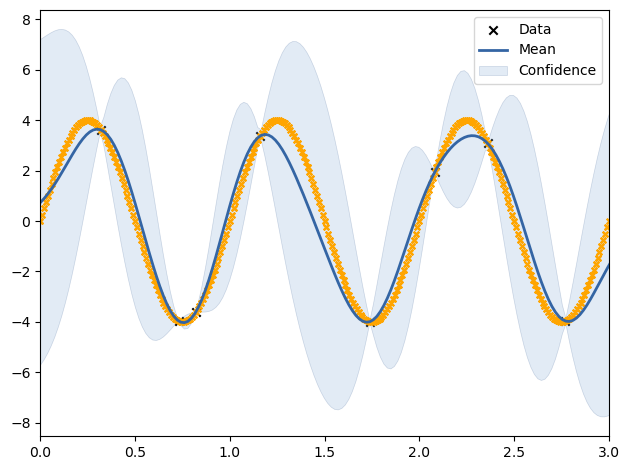

In [10]:
import GPy
import matplotlib.pyplot as plt
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model_GPy = GPy.models.GPRegression(model_1.X, model_1.u_train, kernel)
model_GPy.Gaussian_noise.variance.fix(1e-5)
model_GPy.optimize_restarts(num_restarts = 20, verbose=False)
model_GPy.plot()
plt.scatter(model_1.validation_set[0],model_1.validation_set[1], label = "validation set", color = "orange", marker = "x", s = 15)
plt.xlim(0,3)
model_GPy2 = GPy.models.GPRegression(model_1.Y, model_1.f_train, kernel)
model_GPy2.Gaussian_noise.variance.fix(1e-5)
model_GPy2.optimize_restarts(num_restarts = 20, verbose=False)
model_GPy2.plot()
plt.scatter(model_1.validation_set[2],model_1.validation_set[3], label = "validation set", color = "orange", marker = "x", s = 15)
plt.xlim(0,3)

error = np.mean((model_1.validation_set[1]- model_GPy.predict(model_1.validation_set[0])[0])**2)
print(error)



### Second example
Wave equation:
\begin{equation}
 \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} \; \; \mathrm{ with \; c = 3}
\end{equation}

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:566: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:576: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:607: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:617: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


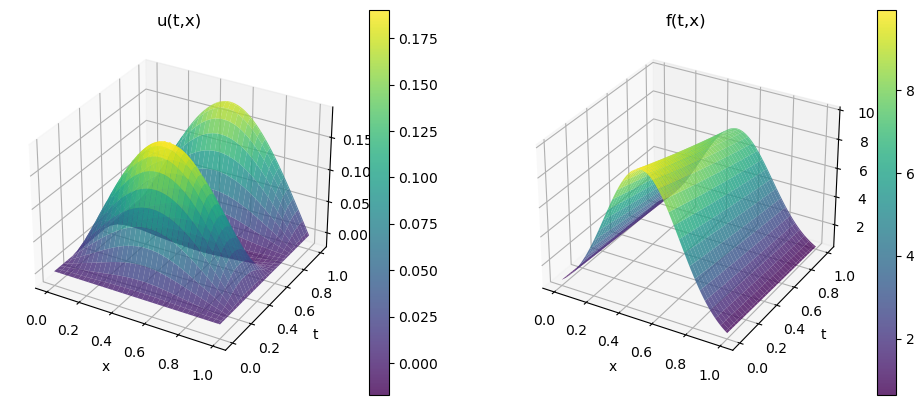

In [11]:
from kernels.kernel_helmholtz import gram_Matrix, k_ff, k_uf, k_fu, k_uu
Kernel = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
params = ["l_x", "sigma_f_sq", "l_t", "c"]
model_2 = PhysicsInformedGP_regressor(kernel =Kernel, timedependence = True,params=params)
model_2.set_name_kernel("helmholtz")
n_training_points = 25
noise = [1e-5,1e-5]
model_2.set_training_data("data_files/gaussian_f_c3.csv", n_training_points, noise)
model_2.set_validation_data(2000)
model_2.plot_raw_data()

In [12]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((4))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 2, 1)
    theta_initial[2] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[3] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 100, -1
model_2.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-2, None), (1e-1, None),(1e-2, None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


     fun: 0.8168926239013672
     jac: array([1.1313477 , 0.2929535 , 1.080246  , 0.07410192], dtype=float32)
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 77
     nit: 12
  status: 2
 success: True
       x: array([0.54489877, 0.05046774, 0.24790978, 2.99182718])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-----------------------------------------------
GP with kernel: 
Training data: (25, 2)
Training targets: (50, 1)
Hyperparameters: {'l_x': 0.5448987661121973, 'sigma_f_sq': 0.05046774260931522, 'l_t': 0.24790978286039445, 'c': 2.9918271837517376}
Log marginal likelihood: 0.8168926239013672
Mean squared error: {'u': 0.0051016067154705524, 'f': 15.564249038696289}
-----------------------------------------------



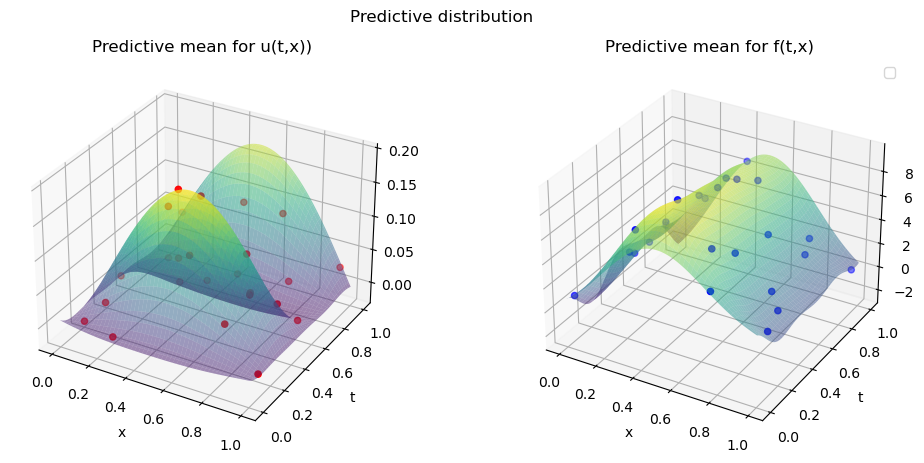

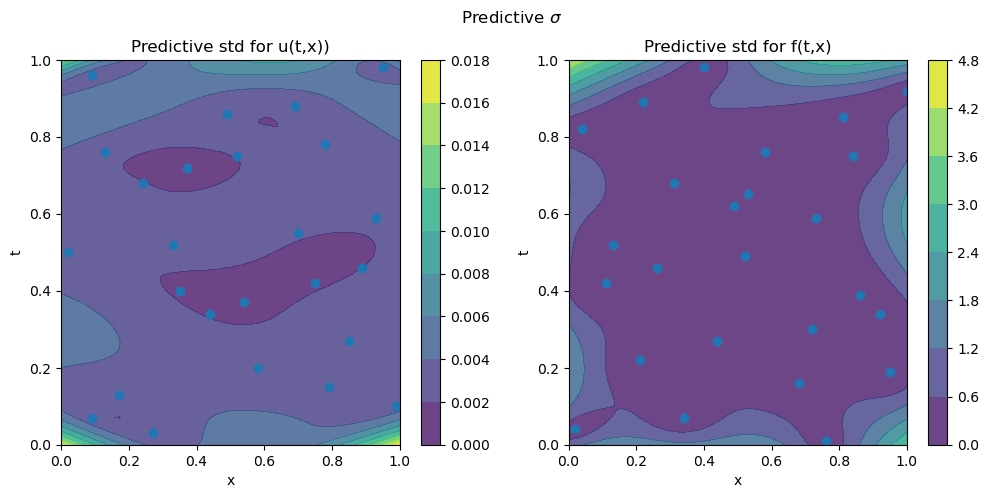

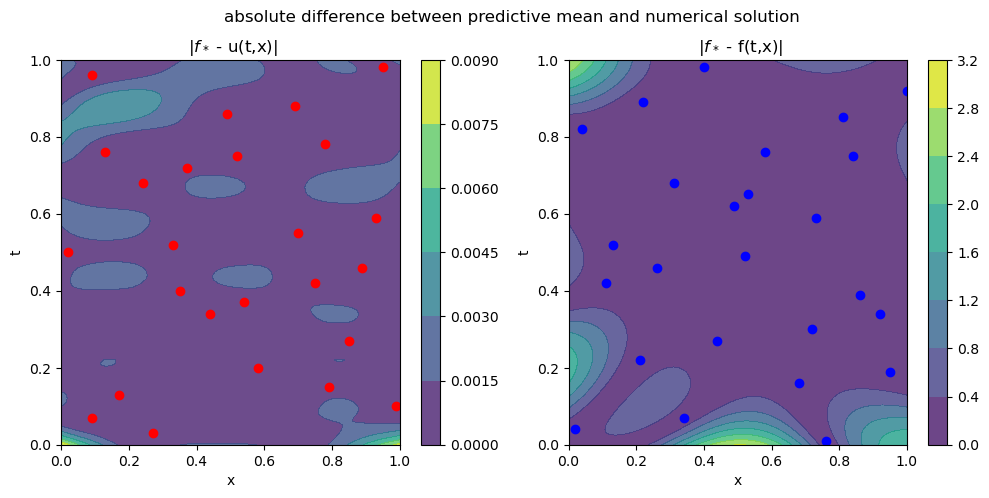

In [13]:
x_star, t_star = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
X_star = np.hstack((x_star.reshape(-1,1),t_star.reshape(-1,1)))
model_2.predict_model(X_star)

model_2.var_u.shape
model_2.plot_prediction(X_star,"Predictive distribution","plots/wave_eq/prediction_2d.png")
model_2.error()
model_2.plot_variance(X_star,"Predictive $\\sigma$","plots/wave_eq/variance_2d.png")
model_2.plot_difference("absolute difference between predictive mean and numerical solution","plots/wave_eq/difference_2d.png")
print(model_2)
